In [107]:
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [108]:
# Chargement de la base de données à partir du fichier CSV
df=pd.read_csv("cancer_database09122024.csv")
df

,ID Patient,Diagnostic,Nom,Prenom,Age,Sexe,Date du diagnostic,Stade du cancer,Type de tumeur,Grade de la tumeur,Récepteur hormonal ER,Récepteur hormonal PR,HER2,Types de Cancer,File_image
0,1,Benign,ANDEME,Flora,45 ans,Feminin,14/12/2024,stade 0,Carcinome canalaire,-,Positif,Positif,Négatif,Carcinome lobulaire infiltrant suspecte,"archive/Normal_cases/1/CC_prior_GT.jpg,archive..."
1,2,Malignant,Ndiaye,Fatou,36 ans,Feminin,20/11/20014,stade 3,Carcinome lobulaire,2,Négatif,Négatif,Positif,Carcinome micropapillaire,"archive/Suspicious_cases/1/CC_prior_GT.jpg,arc..."
2,3,Normal,BA,Mariama,58 ans,Feminin,18/12/20014,-,Aucune,-,Négatif,Négatif,Négatif,Aucun,"archive/Normal_cases/10/CC_prior_GT.jpg,archiv..."


In [109]:
from PIL import Image, ImageTk, ImageDraw, ImageFont
import tkinter as tk
import os

# Listes des chemins d'images (Normal et Suspect)
normal_images = [
    "archive/Normal_cases/1/CC_prior_GT.jpg",
    "archive/Normal_cases/1/MLO_prior_GT.jpg",
    "archive/Normal_cases/10/MLO_prior_GT.jpg",
    "archive/Normal_cases/10/CC_prior_GT.jpg",
    "archive/Normal_cases/11/CC_prior_GT.jpg",
    "archive/Normal_cases/13/MLO_prior_GT.jpg",
    "archive/Normal_cases/15/MLO_prior_GT.jpg",
    "archive/Normal_cases/17/CC_prior_GT.jpg",
     "archive/Normal_cases/25/MLO_prior_GT.jpg",
     "archive/Normal_cases/2/MLO_prior_GT.jpg",
]

suspicious_images = [
    "archive/Suspicious_cases/1/CC_prior_GT.jpg",
    "archive/Suspicious_cases/1/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/10/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/24/CC_prior_GT.jpg",
    "archive/Suspicious_cases/34/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/50/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/44/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/25/MLO_prior_GT.jpg",
    "archive/Suspicious_cases/9/CC_recent_GT.jpg",
    "archive/Suspicious_cases/8/CC_recent_GT.jpg",   
   "archive/Suspicious_cases/16/CC_recent_GT.jpg",
    
]

# Combiner toutes les images en une seule liste
all_images = normal_images + suspicious_images

# Taille cible pour redimensionner les images
target_size = (256, 256)

# Charger une police pour le texte
try:
    font = ImageFont.truetype("arial.ttf", 16)
except IOError:
    font = ImageFont.load_default()

def annotate_image(image_path):
    """Charge et annote une image avec les informations de diagnostic."""
    try:
        # Vérification si l'image existe
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image introuvable : {image_path}")
        
        # Charger et redimensionner l'image
        image = Image.open(image_path).resize(target_size, Image.LANCZOS)

        # Créer une image plus large pour ajouter des annotations
        new_width = image.width + 300
        new_height = image.height
        combined_image = Image.new("RGB", (new_width, new_height), "white")
        combined_image.paste(image, (300, 0))

        # Ajouter du texte (exemple générique ici, vous pouvez personnaliser)
        draw = ImageDraw.Draw(combined_image)
        text = f"Path: {os.path.basename(image_path)}"  # Remplacez par vos propres informations
        text_position = (20, 20)
        draw.multiline_text(text_position, text, fill="black", font=font)

        return combined_image
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path} : {e}")
        return None

class ImageViewer(tk.Tk):
    def __init__(self, image_paths):
        super().__init__()
        self.image_paths = image_paths
        self.current_index = 0
        self.title("Visualiseur d'images médicales")
        self.geometry("800x400")  # Définir une taille initiale pour la fenêtre
        
        # Zone pour afficher l'image
        self.image_label = tk.Label(self)
        self.image_label.pack(pady=20)

        # Boutons de navigation
        btn_prev = tk.Button(
            self, text="← Précédent", bg="yellow", fg="black", command=self.show_previous_image
        )
        btn_prev.pack(side=tk.LEFT, padx=20, pady=10)

        btn_next = tk.Button(
            self, text="Suivant →", bg="blue", fg="white", command=self.show_next_image
        )
        btn_next.pack(side=tk.RIGHT, padx=20, pady=10)

        # Afficher la première image
        self.display_image()

    def display_image(self):
        """Affiche l'image actuelle avec annotation."""
        try:
            image_path = self.image_paths[self.current_index]
            annotated_image = annotate_image(image_path)
            if annotated_image:
                # Convertir l'image PIL en un format compatible avec Tkinter
                tk_image = ImageTk.PhotoImage(annotated_image)
                self.image_label.configure(image=tk_image)
                self.image_label.image = tk_image
        except Exception as e:
            print(f"Erreur d'affichage de l'image : {e}")

    def show_previous_image(self):
        """Afficher l'image précédente."""
        if self.current_index > 0:
            self.current_index -= 1
            self.display_image()

    def show_next_image(self):
        """Afficher l'image suivante."""
        if self.current_index < len(self.image_paths) - 1:
            self.current_index += 1
            self.display_image()




In [110]:
if __name__ == "__main__":
    app = ImageViewer(all_images)
    app.mainloop()

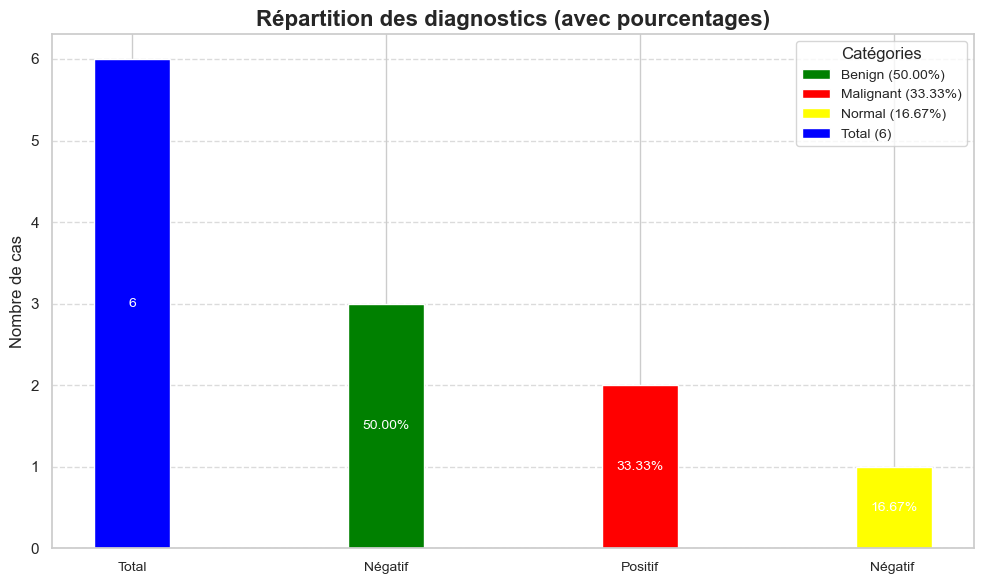

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de dataframe contenant les diagnostics
data = {'HER2': ['Benign', 'Malignant', 'Normal', 'Benign', 'Malignant', 'Benign']}
df = pd.DataFrame(data)

# Création d'une colonne 'Diag' pour catégoriser les diagnostics
df['Diag'] = df['HER2'].map({'Benign': 0, 'Malignant': 1, 'Normal': 2})

# Calcul des statistiques
total_samples = len(df)
counts = df['Diag'].value_counts().sort_index()  # Nombre de chaque catégorie
labels = ['Benign', 'Malignant', 'Normal']
percentages = [(counts.get(i, 0) / total_samples) * 100 for i in range(3)]  # Pourcentages

# Couleurs pour chaque catégorie
colors = ['green', 'red', 'yellow']
bar_positions = [1, 2, 3]

# Création du graphique
plt.figure(figsize=(10, 6))

# Ajout des barres et annotations
bar_width = 0.3  # Largeur réduite des barres
for i, (pos, count, percent, color) in enumerate(zip(bar_positions, counts, percentages, colors)):
    plt.bar(pos, count, bar_width, color=color, label=f"{labels[i]} ({percent:.2f}%)")
    plt.text(pos, count / 2, f"{percent:.2f}%", ha='center', va='center', fontsize=10, color='white')

# Ajout d'une barre pour le total
plt.bar(0, total_samples, bar_width, color='blue', label=f"Total ({total_samples})")
plt.text(0, total_samples / 2, str(total_samples), ha='center', va='center', fontsize=10, color='white')

# Personnalisation du graphique
plt.title("Répartition des diagnostics (avec pourcentages)", fontsize=16, fontweight='bold')
plt.ylabel("Nombre de cas", fontsize=12)
plt.xticks([0, 1, 2, 3], ['Total', 'Négatif', 'Positif', 'Négatif '], fontsize=10)
plt.legend(title="Catégories", loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Affichage du graphique
plt.tight_layout()
plt.show()



C:\Users\user1\AppData\Local\Temp\ipykernel_18920\85381987.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cancer, x='Stade du cancer', palette='viridis')


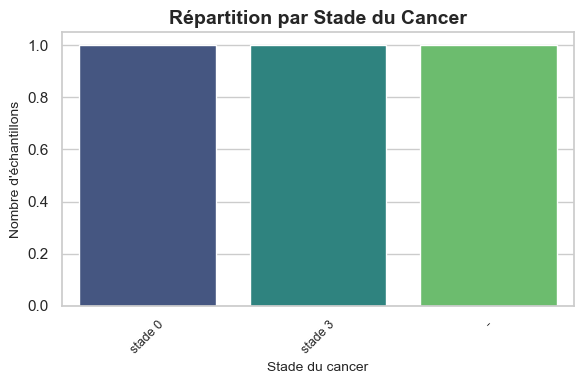

C:\Users\user1\AppData\Local\Temp\ipykernel_18920\85381987.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cancer, x='Type de tumeur', palette='Set2')


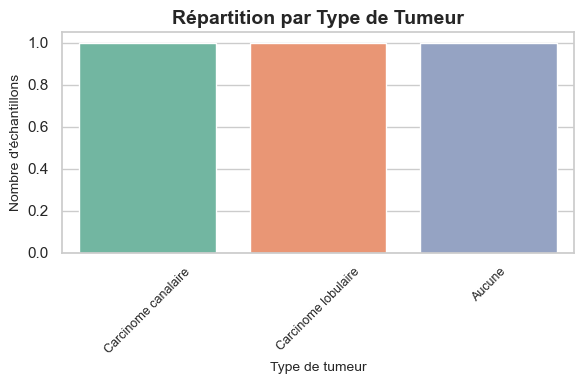

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = "cancer_database09122024.csv"  # Remplacez par le chemin complet si nécessaire
try:
    df_cancer = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Le fichier '{file_path}' est introuvable. Vérifiez le chemin et réessayez.")

# Nettoyer les colonnes (suppression des espaces superflus)
df_cancer.columns = df_cancer.columns.str.strip()

# Vérifier les colonnes attendues
required_columns = ['Nom', 'Prenom', 'Age', 'Stade du cancer', 'Type de tumeur']
missing_columns = [col for col in required_columns if col not in df_cancer.columns]
if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont manquantes dans le fichier : {missing_columns}")

# Appliquer un thème global pour les graphiques
sns.set_theme(style="whitegrid", palette="muted")

# --- Graphique : Répartition par Stade du cancer ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cancer, x='Stade du cancer', palette='viridis')
plt.title("Répartition par Stade du Cancer", fontsize=14, fontweight='bold')
plt.xlabel("Stade du cancer", fontsize=10)
plt.ylabel("Nombre d'échantillons", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

# --- Graphique : Répartition par Type de tumeur ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cancer, x='Type de tumeur', palette='Set2')
plt.title("Répartition par Type de Tumeur", fontsize=14, fontweight='bold')
plt.xlabel("Type de tumeur", fontsize=10)
plt.ylabel("Nombre d'échantillons", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()




In [82]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox, simpledialog
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = "cancer_database09122024.csv"  # Remplacez par le chemin du fichier
try:
    df_cancer = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Le fichier '{file_path}' est introuvable. Vérifiez le chemin et réessayez.")

# Nettoyer les colonnes (suppression des espaces superflus)
df_cancer.columns = df_cancer.columns.str.strip()

# Vérifier les colonnes attendues
required_columns = ['Nom', 'Prenom', 'Age', 'Sexe', 'Date du diagnostic', 
                    'Stade du cancer', 'Type de tumeur', 'Diagnostic', 'HER2', 'Types de Cancer']
missing_columns = [col for col in required_columns if col not in df_cancer.columns]
if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont manquantes dans le fichier : {missing_columns}")

# Fonctions pour la gestion des patients
def get_patient_info():
    """
    Recherche et affiche les informations d'un patient, et génère des diagrammes.
    """
    patient_name = simpledialog.askstring("Recherche Patient", "Entrez le nom du patient :")
    if not patient_name:
        return

    patient = df_cancer[df_cancer['Nom'].str.lower() == patient_name.lower()]
    if patient.empty:
        messagebox.showinfo("Résultat", f"Aucun patient trouvé avec le nom '{patient_name}'.")
        return

    patient_data = patient.iloc[0]
    info = (
        f"Nom : {patient_data['Nom']}\n"
        f"Prénom : {patient_data['Prenom']}\n"
        f"Âge : {patient_data['Age']}\n"
        f"Sexe : {patient_data['Sexe']}\n"
        f"Date du diagnostic : {patient_data['Date du diagnostic']}\n"
        f"Stade du cancer : {patient_data['Stade du cancer']}\n"
        f"Type de tumeur : {patient_data['Type de tumeur']}\n"
        f"Diagnostic : {patient_data['Diagnostic']}\n"
        f"HER2 : {patient_data['HER2']}\n"
        f"Types de Cancer : {patient_data['Types de Cancer']}\n"
    )

    # Affichage des informations en bleu
    result_window = tk.Toplevel(root)
    result_window.title("Informations du Patient")
    result_window.geometry("500x300")
    result_window.configure(bg="#f8f9fa")
    tk.Label(result_window, text=info, justify="left", fg="#007BFF", bg="#f8f9fa", font=("Helvetica", 12)).pack(pady=20)

    # Génération des diagrammes
    generate_bar_chart(patient_data)
    generate_pie_chart()

def generate_bar_chart(patient_data):
    """
    Génère un diagramme en barres coloré en fonction du type de cancer.
    """
    attributes = ['Diagnostic', 'HER2', 'Types de Cancer']
    values = [patient_data['Diagnostic'], patient_data['HER2'], patient_data['Types de Cancer']]
    colors = ['#4CAF50', '#FF9800', '#F44336']  # Vert, Orange, Rouge

    plt.figure(figsize=(8, 4))
    plt.bar(attributes, values, color=colors)
    plt.title(f"Analyse de {patient_data['Nom']}", fontsize=14, fontweight='bold')
    plt.xlabel("Attributs", fontsize=12)
    plt.ylabel("Valeurs", fontsize=12)
    plt.tight_layout()
    plt.show()

def generate_pie_chart():
    """
    Génère un diagramme circulaire représentant les pourcentages des types de cancer.
    """
    cancer_types = df_cancer['Types de Cancer'].value_counts()
    labels = cancer_types.index
    sizes = cancer_types.values
    colors = plt.cm.tab10(range(len(labels)))  # Palette de couleurs

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Répartition des Types de Cancer", fontsize=14, fontweight='bold')
    plt.axis('equal')  # Assure un cercle parfait
    plt.show()

def update_patient_name():
    """
    Met à jour le nom d'un patient.
    """
    old_name = simpledialog.askstring("Modifier Patient", "Entrez le nom actuel du patient :")
    if not old_name:
        return

    if old_name not in df_cancer['Nom'].values:
        messagebox.showerror("Erreur", f"Aucun patient trouvé avec le nom '{old_name}'.")
        return

    new_name = simpledialog.askstring("Modifier Patient", "Entrez le nouveau nom du patient :")
    if not new_name:
        return

    df_cancer.loc[df_cancer['Nom'] == old_name, 'Nom'] = new_name
    messagebox.showinfo("Succès", f"Nom du patient mis à jour de '{old_name}' à '{new_name}'.")

def save_and_exit():
    """
    Sauvegarde les modifications et quitte l'application.
    """
    df_cancer.to_csv(file_path, index=False)
    messagebox.showinfo("Sauvegarde", f"Les modifications ont été enregistrées dans le fichier '{file_path}'.")
    root.destroy()

# Interface utilisateur avec Tkinter
root = tk.Tk()
root.title("Gestion des Patients")
root.geometry("500x400")
root.resizable(False, False)

# Personnalisation des couleurs et styles
root.configure(bg="#f8f9fa")
button_style = {"font": ("Helvetica", 14), "relief": "raised"}

# Création des boutons
tk.Button(root, text="Rechercher un Patient", command=get_patient_info, bg="#007BFF", fg="white", **button_style).pack(pady=15)
tk.Button(root, text="Modifier le Nom d'un Patient", command=update_patient_name, bg="#FFC107", fg="black", **button_style).pack(pady=15)
tk.Button(root, text="Quitter et Sauvegarder", command=save_and_exit, bg="#DC3545", fg="white", **button_style).pack(pady=15)

# Lancement de l'interface
root.mainloop()


In [111]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox, simpledialog
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = "cancer_database09122024.csv"  # Remplacez par le chemin correct de votre fichier CSV

try:
    df_cancer = pd.read_csv(file_path)
    df_cancer.columns = df_cancer.columns.str.strip()  # Nettoyer les colonnes
except FileNotFoundError:
    messagebox.showerror("Erreur", f"Le fichier '{file_path}' est introuvable. Vérifiez le chemin et réessayez.")
    exit()

# Vérifier la présence des colonnes requises
REQUIRED_COLUMNS = [
    'Nom', 'Prenom', 'Age', 'Sexe', 'Date du diagnostic',
    'Stade du cancer', 'Type de tumeur', 'Diagnostic', 'HER2', 'Types de Cancer'
]
missing_columns = [col for col in REQUIRED_COLUMNS if col not in df_cancer.columns]
if missing_columns:
    messagebox.showerror("Erreur", f"Colonnes manquantes dans le fichier : {missing_columns}")
    exit()

# Fonctions principales
def get_patient_info():
    """Recherche et affiche les informations d'un patient, et génère des graphiques."""
    patient_name = simpledialog.askstring("Recherche Patient", "Entrez le nom du patient :")
    if not patient_name:
        return

    patient = df_cancer[df_cancer['Nom'].str.lower() == patient_name.lower()]
    if patient.empty:
        messagebox.showinfo("Résultat", f"Aucun patient trouvé avec le nom '{patient_name}'.")
        return

    patient_data = patient.iloc[0]
    display_patient_info(patient_data)
    generate_bar_chart(patient_data)
    generate_pie_chart()

def display_patient_info(patient_data):
    """Affiche les informations d'un patient dans une nouvelle fenêtre."""
    info = "\n".join([
        f"Nom : {patient_data['Nom']}",
        f"Prénom : {patient_data['Prenom']}",
        f"Âge : {patient_data['Age']}",
        f"Sexe : {patient_data['Sexe']}",
        f"Date du diagnostic : {patient_data['Date du diagnostic']}",
        f"Stade du cancer : {patient_data['Stade du cancer']}",
        f"Type de tumeur : {patient_data['Type de tumeur']}",
        f"Diagnostic : {patient_data['Diagnostic']}",
        f"HER2 : {patient_data['HER2']}",
        f"Types de Cancer : {patient_data['Types de Cancer']}",
    ])

    result_window = tk.Toplevel(root)
    result_window.title("Informations du Patient")
    result_window.geometry("600x400")
    result_window.configure(bg="#f8f9fa")

    tk.Label(result_window, text="Informations du Patient", font=("Helvetica", 18, "bold"), bg="#f8f9fa").pack(pady=10)
    tk.Label(result_window, text=info, justify="left", bg="#f8f9fa", font=("Helvetica", 12)).pack(pady=20)

def generate_bar_chart(patient_data):
    """Génère un diagramme en barres des principales caractéristiques."""
    attributes = ['Diagnostic', 'HER2', 'Types de Cancer']
    values = [str(patient_data[attr]) for attr in attributes]
    colors = ['#4CAF50', '#FF9800', '#F44336']

    plt.figure(figsize=(8, 5))
    plt.bar(attributes, values, color=colors)
    plt.title(f"Caractéristiques principales de {patient_data['Nom']}", fontsize=14, fontweight='bold')
    plt.xlabel("Attributs", fontsize=12)
    plt.ylabel("Valeurs", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def generate_pie_chart():
    """Génère un diagramme circulaire des diagnostics avec des pourcentages personnalisés."""
    # Définir les étiquettes et leurs pourcentages personnalisés
    labels = ['Benign', 'Malignant', 'Normal']
    sizes = [50, 33.33, 16.67]  # Pourcentages personnalisés

    # Couleurs associées
    colors = ['#FFC107', '#F44336', '#4CAF50']  # Jaune, Rouge, Vert

    # Création du diagramme circulaire
    plt.figure(figsize=(8, 6))
    plt.pie(
        sizes,
        labels=[f"{label} ({size:.2f}%)" for label, size in zip(labels, sizes)],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12}
    )
    plt.title("Répartition des Diagnostics", fontsize=14, fontweight='bold')
    plt.axis('equal')  # Assure un cercle parfait
    plt.show()


def update_patient_name():
    """Met à jour le nom d'un patient."""
    old_name = simpledialog.askstring("Modifier Patient", "Entrez le nom actuel du patient :")
    if not old_name:
        return

    if old_name.lower() not in df_cancer['Nom'].str.lower().values:
        messagebox.showerror("Erreur", f"Aucun patient trouvé avec le nom '{old_name}'.")
        return

    new_name = simpledialog.askstring("Modifier Patient", "Entrez le nouveau nom du patient :")
    if not new_name:
        return

    df_cancer.loc[df_cancer['Nom'].str.lower() == old_name.lower(), 'Nom'] = new_name
    messagebox.showinfo("Succès", f"Le nom a été mis à jour de '{old_name}' à '{new_name}'.")

def save_and_exit():
    """Sauvegarde les modifications et quitte l'application."""
    try:
        df_cancer.to_csv(file_path, index=False)
        messagebox.showinfo("Succès", f"Les modifications ont été enregistrées dans '{file_path}'.")
    except Exception as e:
        messagebox.showerror("Erreur", f"Échec de la sauvegarde : {str(e)}")
    finally:
        root.destroy()

# Interface utilisateur
root = tk.Tk()
root.title("Gestion des Patients")
root.geometry("500x450")
root.configure(bg="#f8f9fa")

tk.Label(root, text="Système de Gestion des Patients", font=("Helvetica", 16, "bold"), bg="#f8f9fa").pack(pady=20)

btn_style = {"font": ("Helvetica", 14), "relief": "raised"}
tk.Button(root, text="Rechercher un Patient", command=get_patient_info, bg="#007BFF", fg="white", **btn_style).pack(pady=15)
tk.Button(root, text="Modifier le Nom d'un Patient", command=update_patient_name, bg="#FFC107", fg="black", **btn_style).pack(pady=15)
tk.Button(root, text="Quitter et Sauvegarder", command=save_and_exit, bg="#DC3545", fg="white", **btn_style).pack(pady=15)




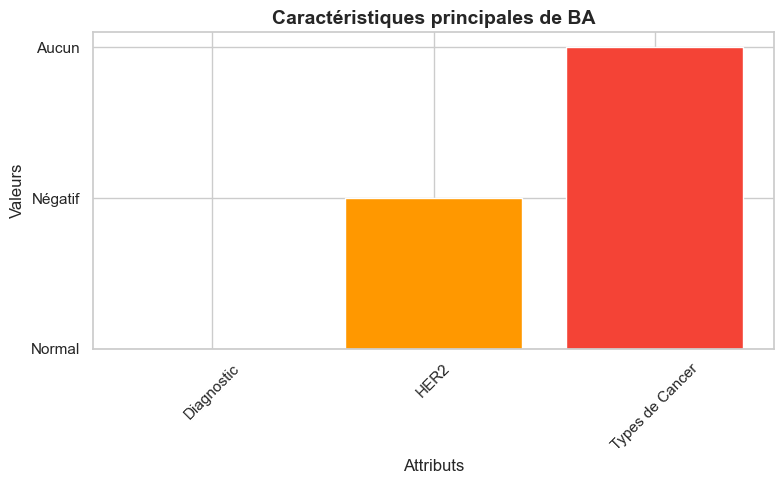

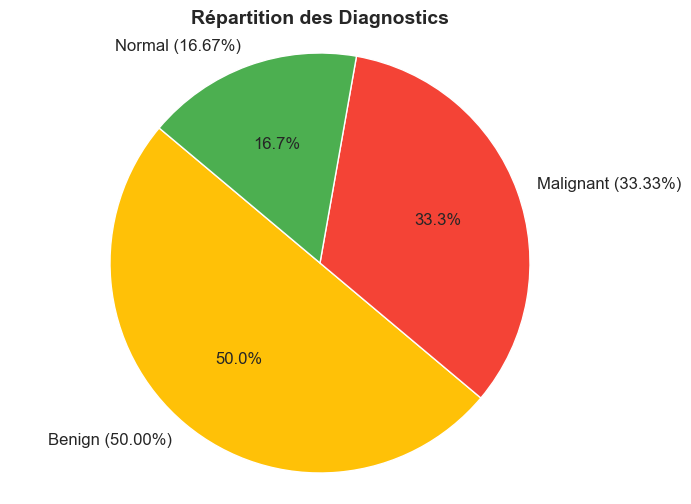

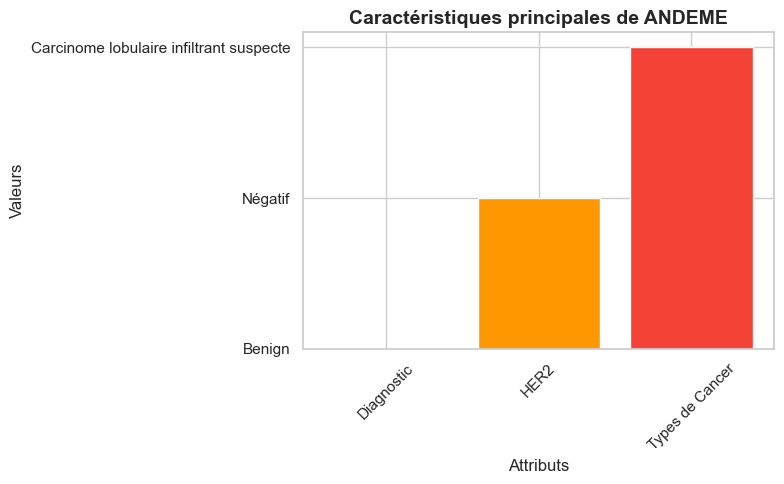

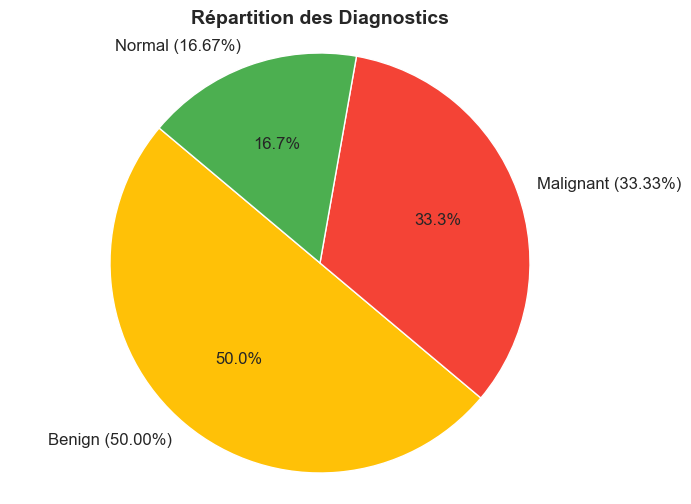

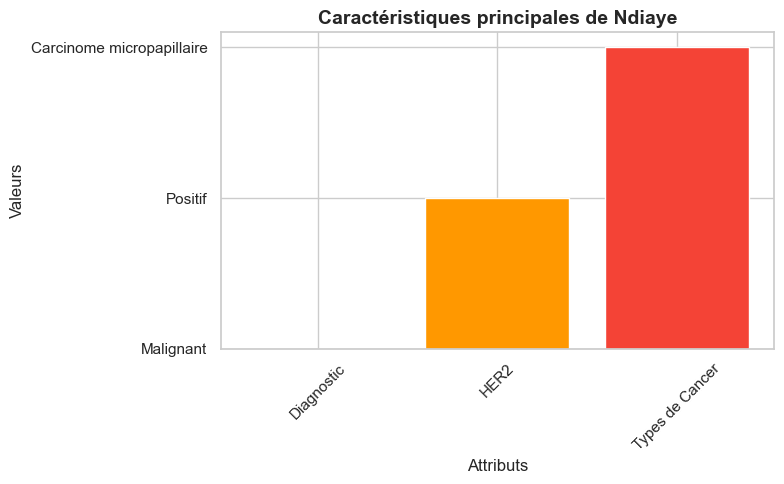

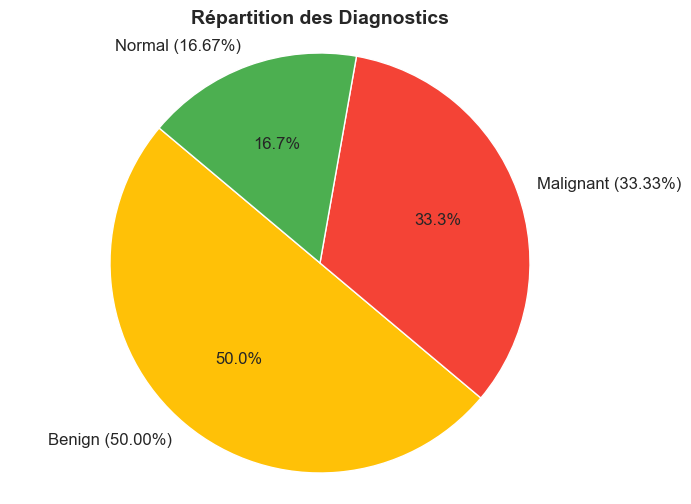

In [ ]:
root.mainloop()